# Modelling and Analysis of Complex Networks - Homework 2

## Setup

In [1]:
### Installing and Importing Packages

!pip install networkx
import networkx as nx

### Creating the graphs

#Create two NetworkX graph objects for Facebook and Twitter. The graph for Facebook is undirected but the graph for Twitter is Directed.
facebook = nx.Graph()
twitter = nx.DiGraph()

#Read the edges and construct the graph for Facebook -
#It is important to note that facebook's graph is undirected and that The 'ego' node does not appear, but it is assumed that they follow every node id that appears in the file.
f = open("Facebook-Ego/3437_2.edges", "r")
fb_edges = []

for line in f:
  node_1 = int(line.split(" ")[0])
  node_2 = int(line.split(" ")[1])
  fb_edges.append((node_1, node_2))
f.close()

facebook.add_edges_from(fb_edges)

#Read the edges and construct the graph for Twitter -
#It is important to note that Edges are directed (a follows b). The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.
f = open("Twitter-Ego/6408382.edges", "r")
twitter_edges = []

for line in f:
  node_1 = int(line.split(" ")[0])
  node_2 = int(line.split(" ")[1])
  twitter_edges.append((node_1, node_2))
f.close()

twitter.add_edges_from(twitter_edges)

## (a) What is the degree distribution of the network? Please plot the distribution and attach it to your answer sheet.

In [2]:
import matplotlib.pyplot as plt
import collections

### Facebook

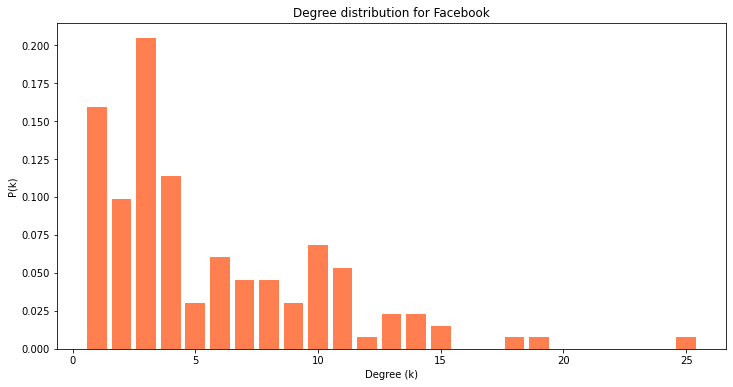

In [3]:
degrees = [d for _, d in facebook.degree()]

degree_count = collections.Counter(degrees)
deg, cnt = zip(*degree_count.items())

cnt = [float(c) / sum(cnt) for c in cnt]

plt.figure(figsize=(12, 6))
plt.bar(deg, cnt, color="coral", width=0.80)
plt.title("Degree distribution for Facebook")
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.show()

### Twitter

Since it is a directed graph we differentiate between in-degrees and out-degrees

#### In-degrees

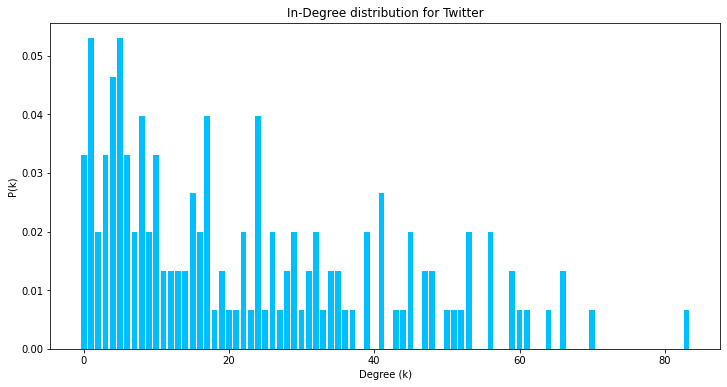

In [4]:
in_degrees = [d for _, d in twitter.in_degree()]

in_degree_count = collections.Counter(in_degrees)
deg, cnt = zip(*in_degree_count.items())

cnt = [float(c) / sum(cnt) for c in cnt]

plt.figure(figsize=(12, 6))
plt.bar(deg, cnt, color="deepskyblue", width=0.8)
plt.title("In-Degree distribution for Twitter")
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.show()

#### Out-degrees

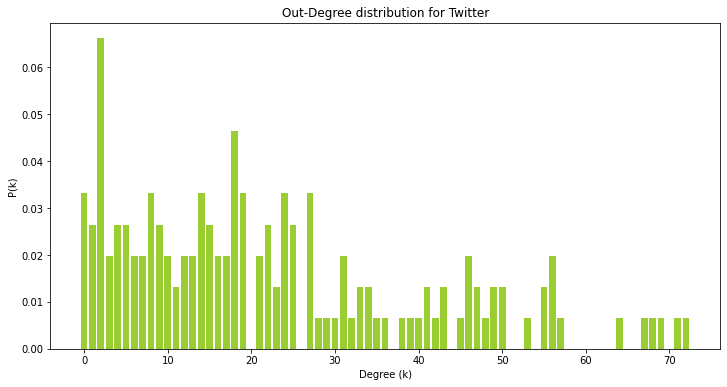

In [5]:
out_degrees = [d for _, d in twitter.out_degree()]

out_degree_count = collections.Counter(out_degrees)
deg, cnt = zip(*out_degree_count.items())

cnt = [float(c) / sum(cnt) for c in cnt]

plt.figure(figsize=(12, 6))
plt.bar(deg, cnt, color="yellowgreen", width=0.8)
plt.title("Out-Degree distribution for Twitter")
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.show()

## (b) According to the degree distribution, what is the main difference between the chosen network and a random network with the same number of nodes? What may cause the difference?

The chosen networks follow a heavy tailed distributions with most nodes having few connections and therefore low degrees (often a power-law distribution). However, in a random network the distribution is (almost) a normal distribution centered around the average degree (Erdos-Renyi). This is mainly because networks in the real world such as facebook or twitter, work in way where the more you are connected, the more likely you are to connect with more people who are also well connected creating a small number of "famous" nodes with high degrees and a majority of nodes with few connections. However, in random networks edges are randomly placed between nodes which leads to a more normal looking distribution of degrees without a highly connected minority.

## (c) What is the average path length of the network?

### Facebook

In [6]:
# check if the grah is connected
if nx.is_connected(facebook):
    avg_path_length_facebook = nx.average_shortest_path_length(facebook)
    print(f"Average path length for the Facebook network: {avg_path_length_facebook}")
# if not connected we compute the path length for the largest connected component
else:
    print("The Facebook graph is not connected, calculating for the largest component.")
    largest_component_facebook = max(nx.connected_components(facebook), key=len)
    subgraph_facebook = facebook.subgraph(largest_component_facebook)
    avg_path_length_facebook = nx.average_shortest_path_length(subgraph_facebook)
    print(f"Average path length for the largest component in Facebook network: {avg_path_length_facebook}")

The Facebook graph is not connected, calculating for the largest component.
Average path length for the largest component in Facebook network: 4.625429553264605


### Twitter

In [7]:
# check if the grah is STRONGLY connected
if nx.is_strongly_connected(twitter):
    avg_path_length_twitter = nx.average_shortest_path_length(twitter)
    print(f"Average path length for the Twitter network: {avg_path_length_twitter}")
# if not connected we compute the path length for the largest STRONGLY connected component
else:
    print("The Twitter graph is not strongly connected, calculating for the largest strongly connected component.")
    largest_scc_twitter = max(nx.strongly_connected_components(twitter), key=len)
    subgraph_twitter = twitter.subgraph(largest_scc_twitter)
    avg_path_length_twitter = nx.average_shortest_path_length(subgraph_twitter)
    print(f"Average path length for the largest strongly connected component in Twitter network: {avg_path_length_twitter}")


The Twitter graph is not strongly connected, calculating for the largest strongly connected component.
Average path length for the largest strongly connected component in Twitter network: 2.1319148936170214


## (d) Please randomly choose 5 nodes from the network, and calculate the clustering coefficients of these nodes, respectively.

In [8]:
import random

### Facebook

In [9]:
# select 5 nodes randomly
random_nodes = random.sample(list(facebook.nodes()), 5)

# calculate their clustering coefficient
fb_clustering_coeffs = {}

for node in random_nodes:
    fb_clustering_coeffs[node] = nx.clustering(facebook, node)

print(f"Clustering coefficients for 5 random nodes from facebook:")
for node, coeff in fb_clustering_coeffs.items():
    print(f"Node {node}: Clustering Coefficient = {coeff}")

Clustering coefficients for 5 random nodes from facebook:
Node 3621: Clustering Coefficient = 0.6666666666666666
Node 3637: Clustering Coefficient = 0
Node 3710: Clustering Coefficient = 0.6909090909090909
Node 3718: Clustering Coefficient = 0.6666666666666666
Node 3611: Clustering Coefficient = 0.7142857142857143


### Twitter

In [10]:
# select 5 nodes randomly
random_nodes = random.sample(list(twitter.nodes()), 5)

# calculate their clustering coefficient
tw_clustering_coeffs = {}

for node in random_nodes:
    tw_clustering_coeffs[node] = nx.clustering(twitter, node)

print(f"Clustering coefficients for 5 random nodes from twitter:")
for node, coeff in tw_clustering_coeffs.items():
    print(f"Node {node}: Clustering Coefficient = {coeff}")

Clustering coefficients for 5 random nodes from twitter:
Node 25979812: Clustering Coefficient = 0.47043413173652693
Node 14807898: Clustering Coefficient = 0.392162639952858
Node 29020760: Clustering Coefficient = 0.3834080717488789
Node 277401500: Clustering Coefficient = 0.4025641025641026
Node 33727504: Clustering Coefficient = 0.37306501547987614


## (e) What is the average clustering coefficient?

In [11]:
# Facebook
fb_avg_clustering_coeff = sum(fb_clustering_coeffs.values()) / len(fb_clustering_coeffs)
print(f"Average clustering coefficient of the 5 nodes for facebook: {fb_avg_clustering_coeff}")

Average clustering coefficient of the 5 nodes for facebook: 0.5477056277056277


In [12]:
# Facebook
tw_avg_clustering_coeffs = sum(tw_clustering_coeffs.values()) / len(tw_clustering_coeffs)
print(f"Average clustering coefficient of the 5 nodes for twitter: {tw_avg_clustering_coeffs}")

Average clustering coefficient of the 5 nodes for twitter: 0.40432679229644847


## (f) Please list the nodes which compose the largest component in the network.

### Facebook

In [14]:
fb_largest_component = max(nx.connected_components(facebook), key=len)
fb_largest_component

{3584,
 3586,
 3587,
 3589,
 3590,
 3591,
 3592,
 3593,
 3596,
 3598,
 3599,
 3601,
 3602,
 3603,
 3604,
 3605,
 3607,
 3608,
 3609,
 3610,
 3611,
 3615,
 3617,
 3618,
 3620,
 3621,
 3622,
 3623,
 3625,
 3626,
 3627,
 3629,
 3630,
 3631,
 3633,
 3634,
 3635,
 3636,
 3637,
 3640,
 3641,
 3642,
 3643,
 3644,
 3645,
 3646,
 3648,
 3651,
 3654,
 3655,
 3656,
 3658,
 3659,
 3660,
 3663,
 3664,
 3666,
 3667,
 3670,
 3672,
 3674,
 3677,
 3680,
 3681,
 3683,
 3684,
 3685,
 3686,
 3687,
 3689,
 3690,
 3692,
 3693,
 3694,
 3696,
 3697,
 3698,
 3702,
 3703,
 3705,
 3706,
 3707,
 3710,
 3711,
 3712,
 3713,
 3714,
 3715,
 3718,
 3719,
 3721,
 3722,
 3724,
 3728,
 3730,
 3731,
 3732}

### Twitter

In [16]:
tw_largest_component = max(nx.strongly_connected_components(twitter), key=len)
tw_largest_component

{183813,
 617243,
 739773,
 809864,
 1249751,
 3779381,
 4620451,
 5110861,
 5306652,
 5747502,
 6258042,
 7398912,
 7623482,
 8362812,
 8904302,
 9224902,
 10278592,
 12702822,
 12999452,
 14147626,
 14155927,
 14173097,
 14456798,
 14726202,
 14760624,
 14801264,
 14807898,
 14831031,
 14844734,
 14856594,
 14936377,
 14955344,
 15039741,
 15099133,
 15180686,
 15290966,
 15648491,
 15747590,
 16434310,
 16475403,
 16593859,
 16890327,
 16913834,
 17120124,
 17132311,
 17621204,
 18475366,
 18880017,
 18940840,
 19095849,
 19496411,
 19730041,
 19769729,
 20339676,
 21210048,
 21603325,
 21755787,
 21808052,
 22139698,
 22712077,
 23177321,
 23595873,
 23739721,
 24844163,
 25979812,
 29020760,
 29912873,
 30572722,
 31388170,
 33727504,
 34635076,
 35718360,
 36757972,
 37665322,
 37878528,
 39465431,
 39796783,
 41385649,
 42523468,
 44874400,
 46422814,
 48600145,
 51018910,
 51305605,
 53609015,
 54528491,
 60683341,
 64674727,
 64692164,
 64838619,
 74880095,
 79024978,
 8024588